In [ ]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Seting the aesthetics for seaborn plots
sns.set(style="whitegrid")


In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('diabetic_data.csv')

# Display the initial shape and a concise summary of the dataset
print("Initial Dataset Shape:", df.shape)
df.info()


Initial Dataset Shape: (101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures         

In [3]:
# Standardize missing values by replacing '?' with NaN
df.replace('?', np.nan, inplace=True)
# Displaying the first few rows of the dataframe
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Droping columns with more than 50% missing values
threshold_missing = len(df) * 0.5
df.dropna(thresh=threshold_missing, axis=1, inplace=True)

# Droping columns where over 95% of the values are the same
# Applying  lambda function to check maximum value count for each column
# Keeping columns where maximum value count is less than 95%
df = df.loc[:, df.apply(lambda col: col.value_counts(normalize=True).max() < 0.95)]

df.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [5]:
# Function to convert age ranges to their midpoint values
# For example, the range [10-20) will be converted to 15
def age_midpoint(age_range):
    # Removing the brackets and split the range into lower and upper bounds
    lower, upper = age_range[1:-1].split('-')
    # Calculate the midpoint by averaging the lower and upper bounds, convert to integer for simplicity
    return (int(lower) + int(upper)) / 2

# Ensure the 'age_midpoint' function is defined prior to applying it to the DataFrame
# Apply the function to the 'age' column to convert age ranges to midpoints
# This enhances the data's numerical representation and might improve model performance
df['age'] = df['age'].apply(age_midpoint)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [6]:
# Replacing missing values in diagnosis columns ('diag_1', 'diag_2', 'diag_3') with 0
df['diag_1'].fillna('0', inplace=True)
df['diag_2'].fillna('0', inplace=True)
df['diag_3'].fillna('0', inplace=True)

# Display a summary to verify that the missing values have been replaced
print(df[['diag_1', 'diag_2', 'diag_3']].info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   diag_1  101766 non-null  object
 1   diag_2  101766 non-null  object
 2   diag_3  101766 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


In [7]:
# Drop all rows with missing values
df.dropna(inplace=True)

# Identifying all numerical features and form a list
# Select columns with numerical data types and convert them to a list
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Identifying categorical features and form a list
# Select columns with non-numerical data types and convert them to a list
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Identifying outliers in numerical columns and remove them
# Calculate the Z-score for each numerical feature and remove rows where Z-score > 3
# 'stats.zscore()' calculates the Z-score for each numerical feature
# Rows with Z-score > 3 for any numerical feature are removed
df = df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Remove duplicates in the column 'patient_nbr'
# Remove duplicate rows based on the 'patient_nbr' column
df.drop_duplicates(subset=['patient_nbr'], inplace=True)

# Show the shape of the resulting DataFrame
print("Final Dataset Shape:", df.shape)


Final Dataset Shape: (17508, 31)


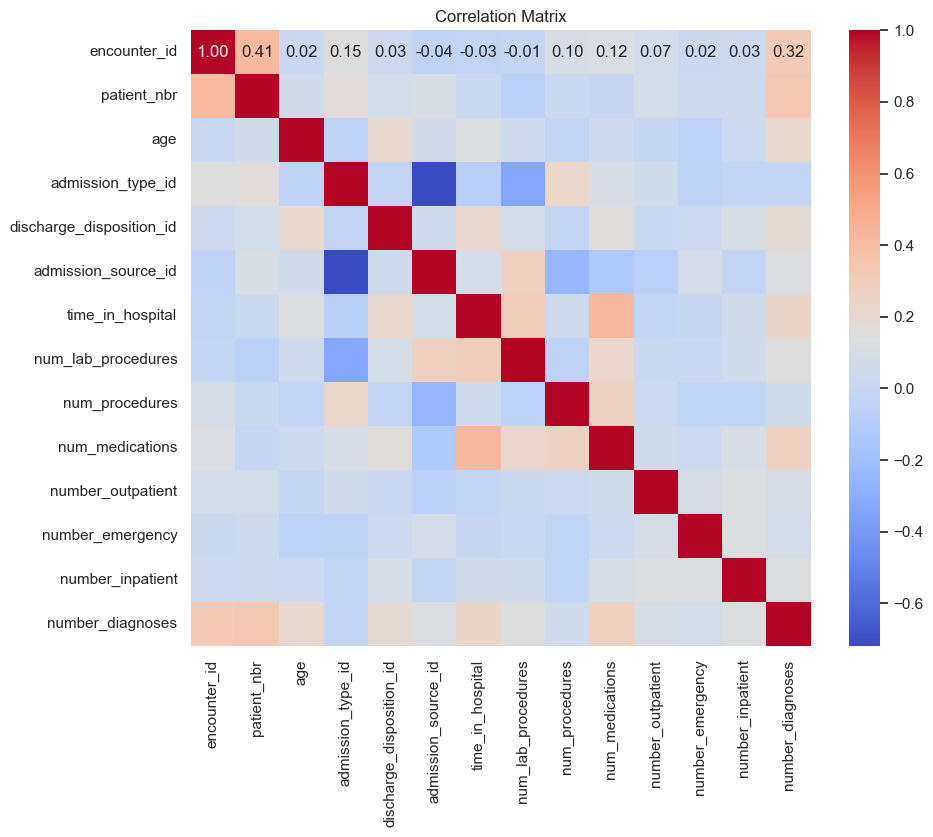

In [8]:
# Selected only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


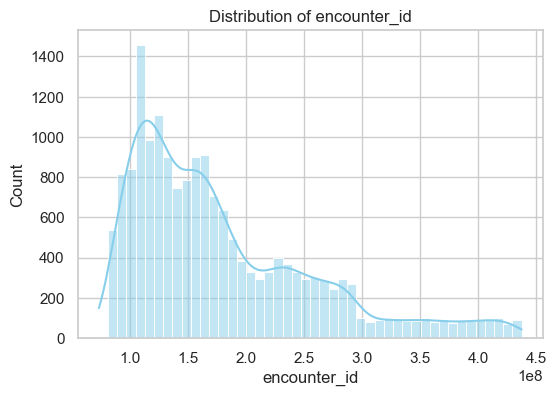

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


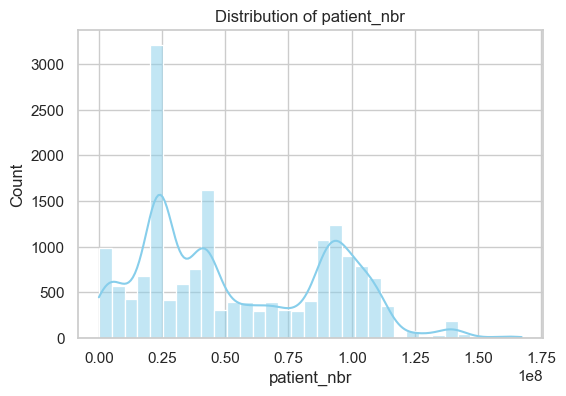

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


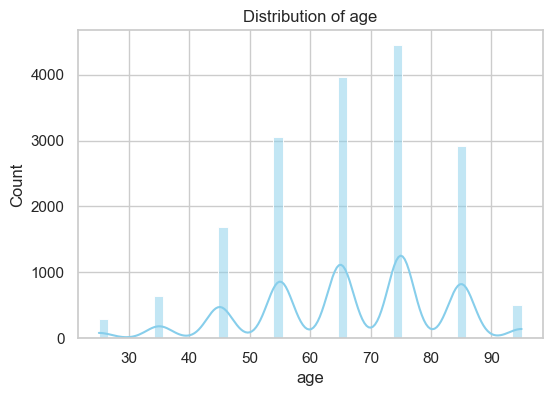

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


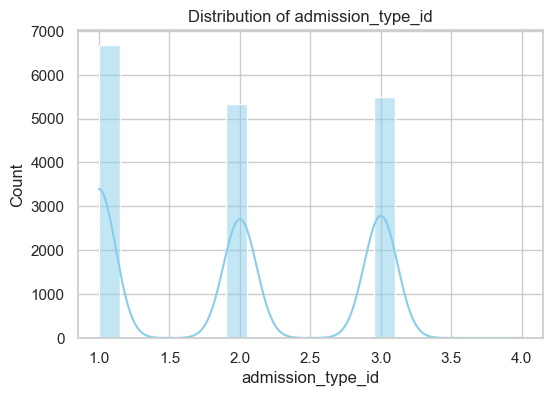

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


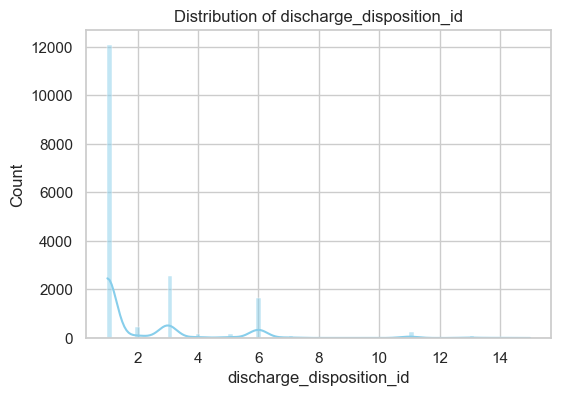

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


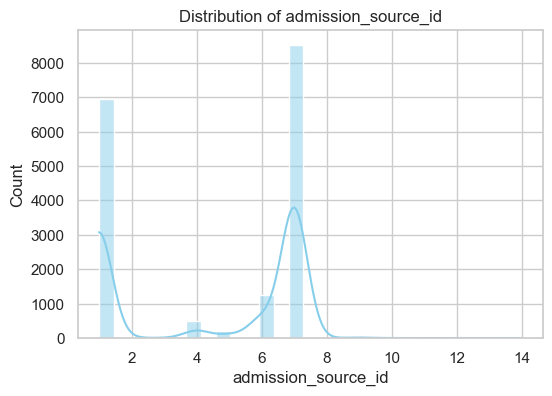

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


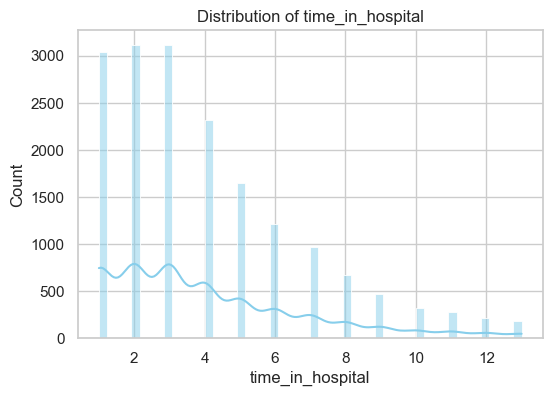

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


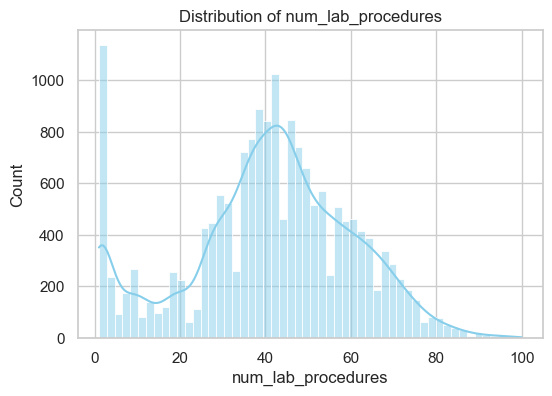

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


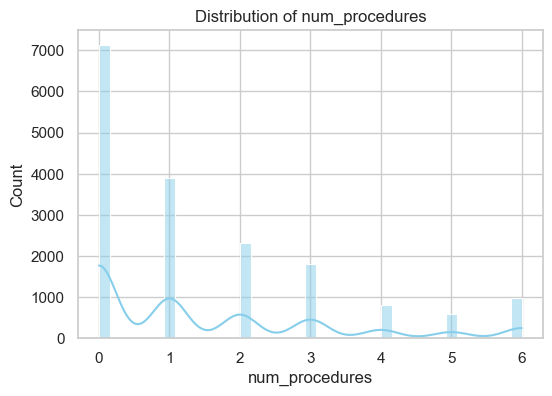

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


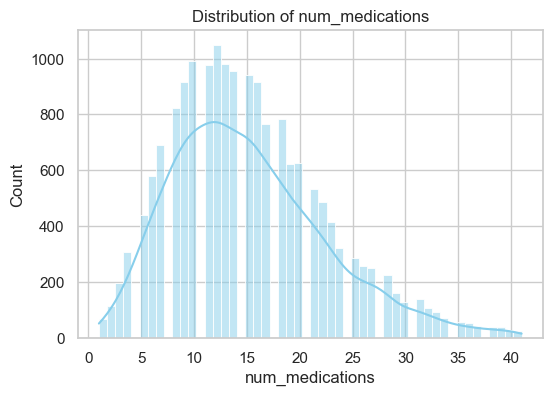

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


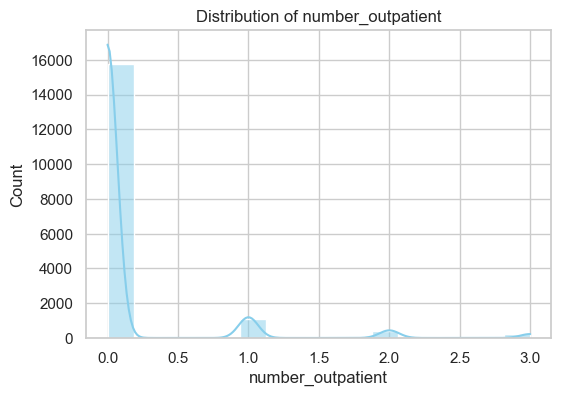

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


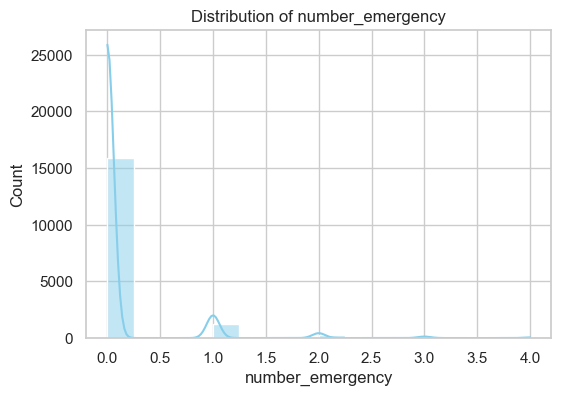

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


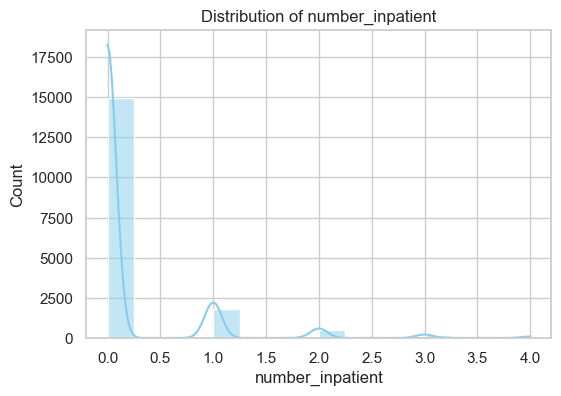

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


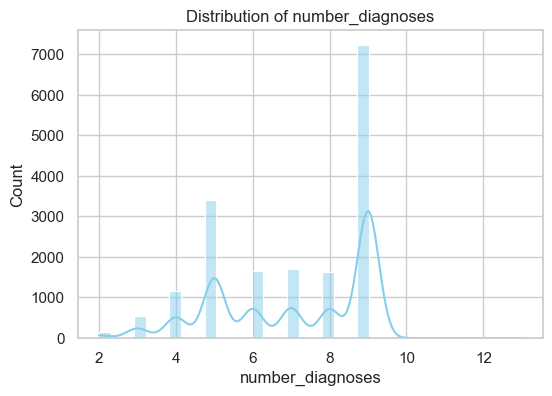

In [9]:
# Plotting distributions for numerical features
for feature in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.show()


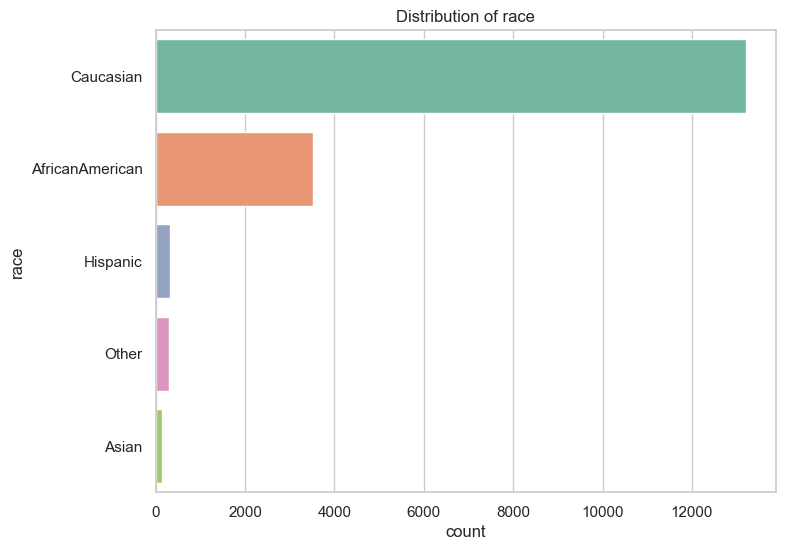

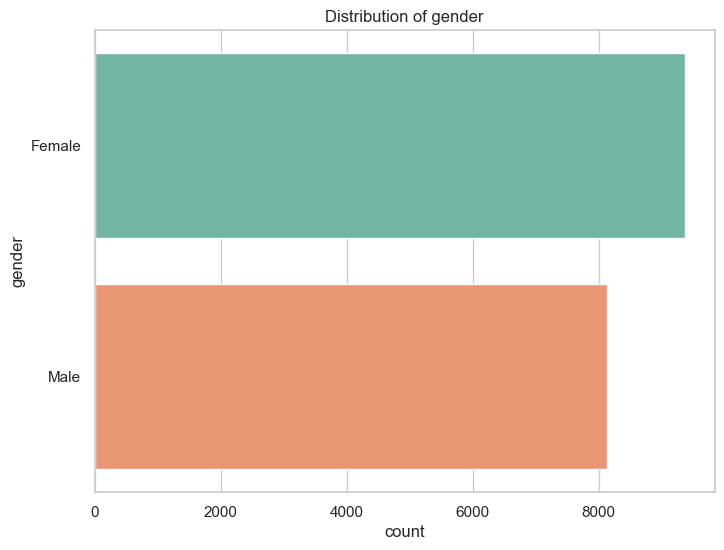

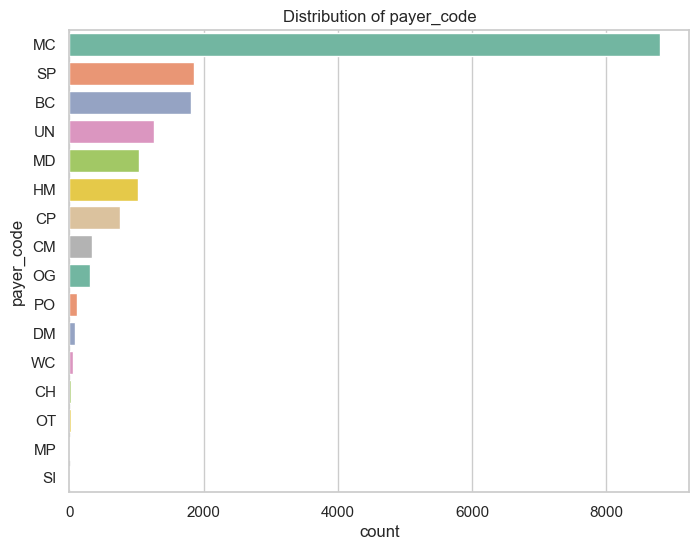

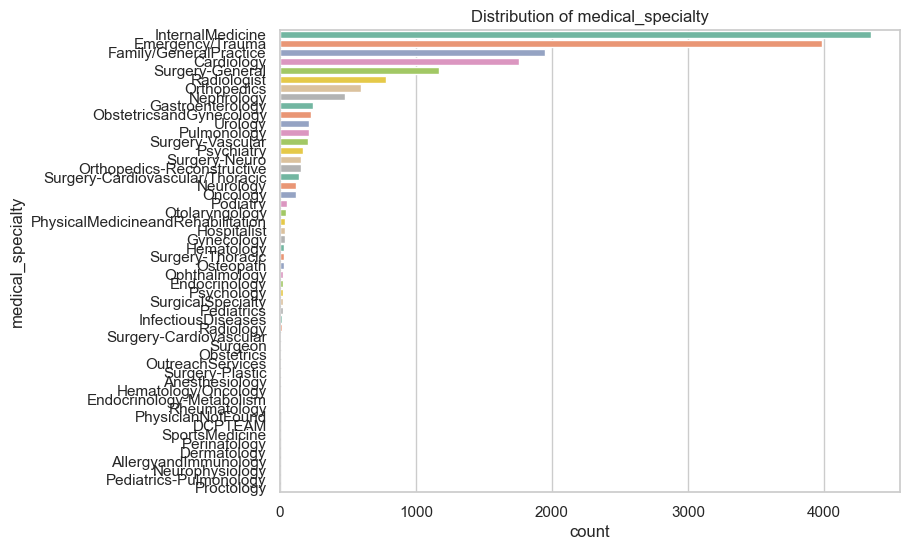

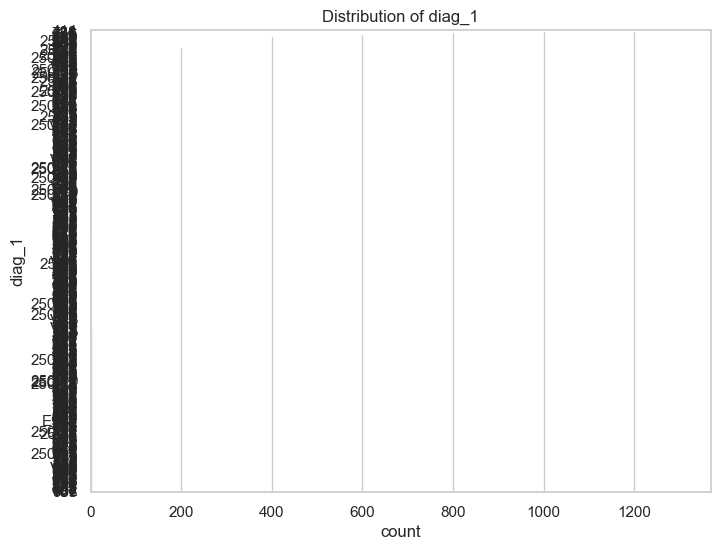

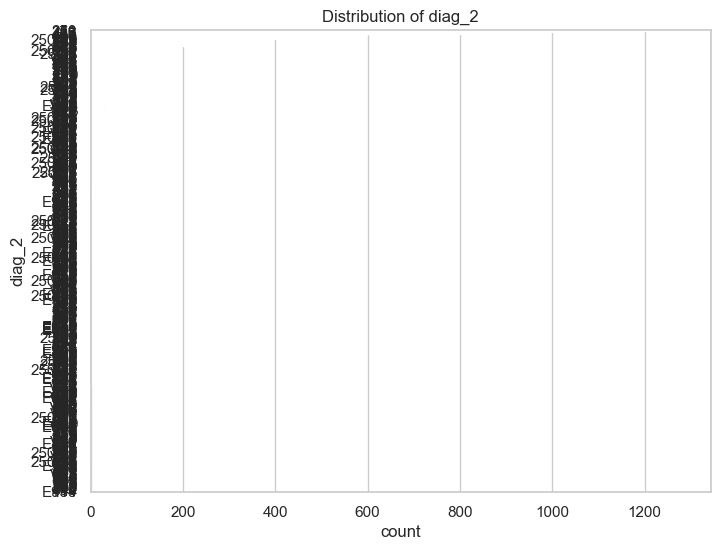

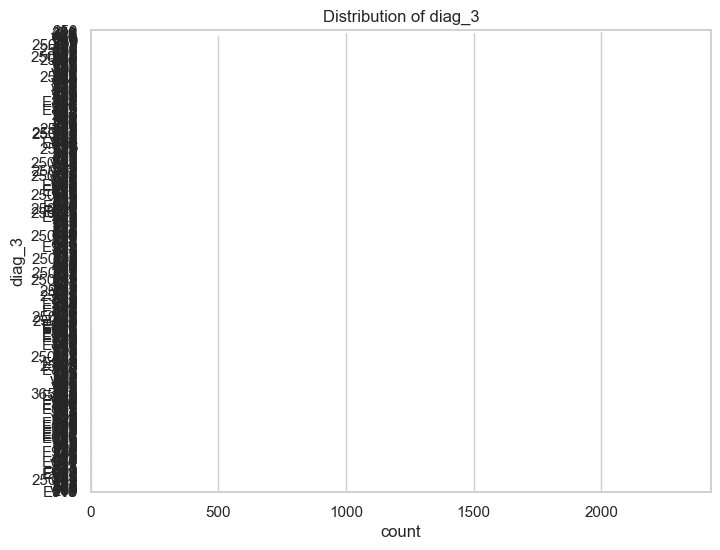

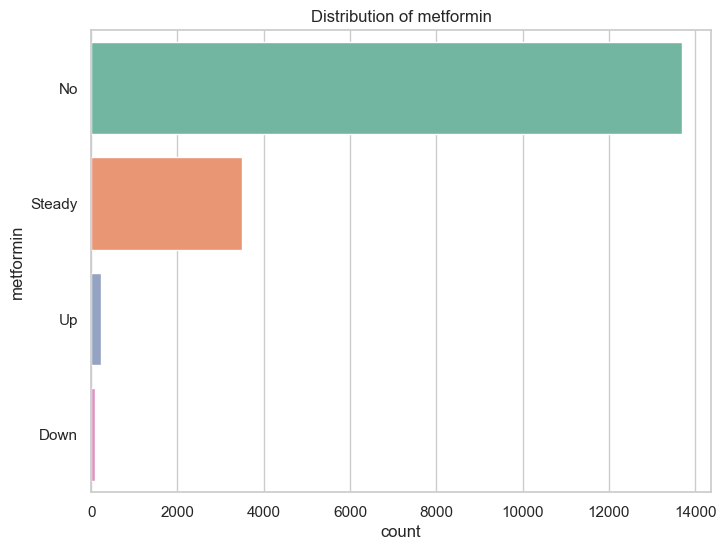

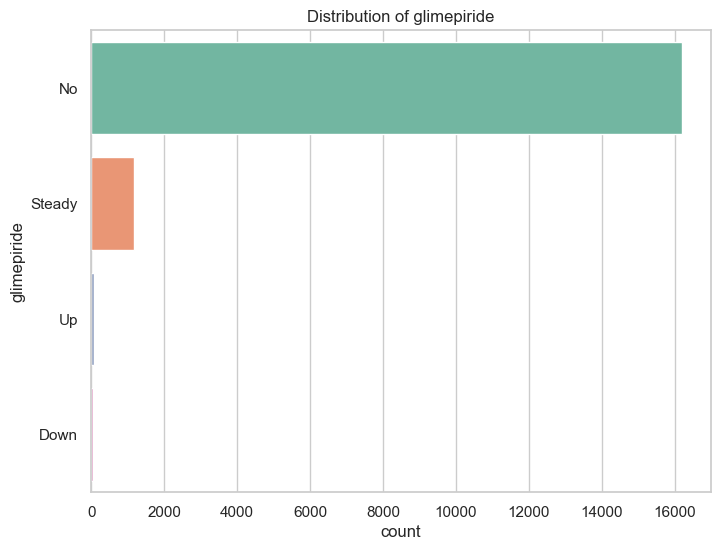

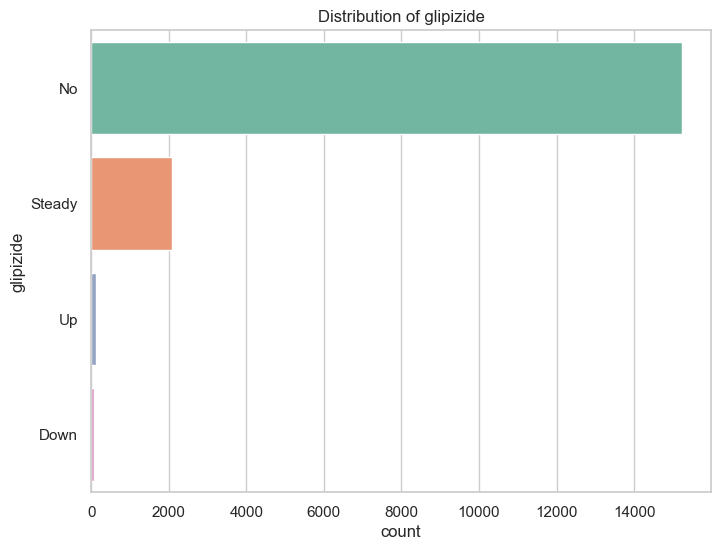

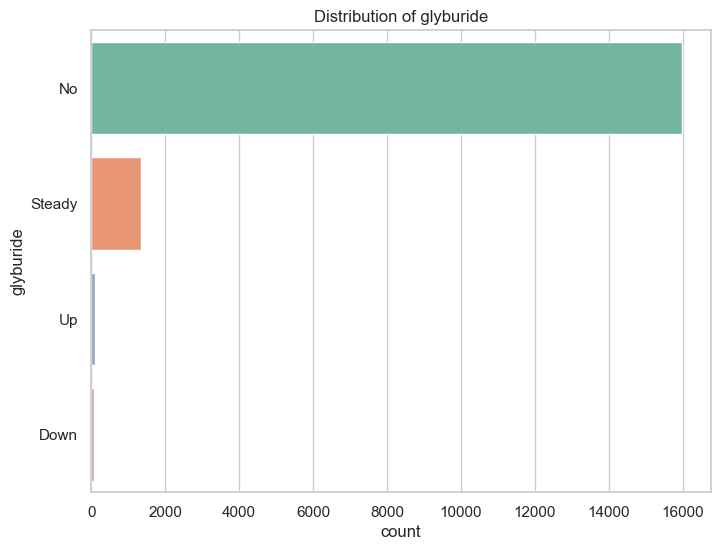

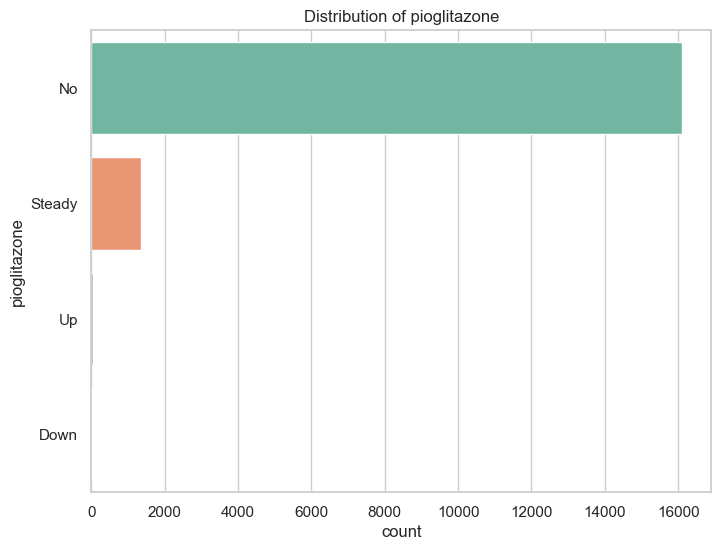

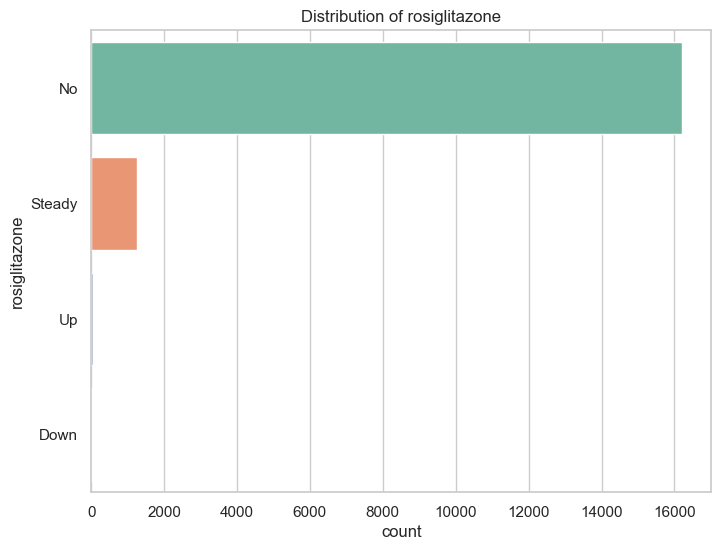

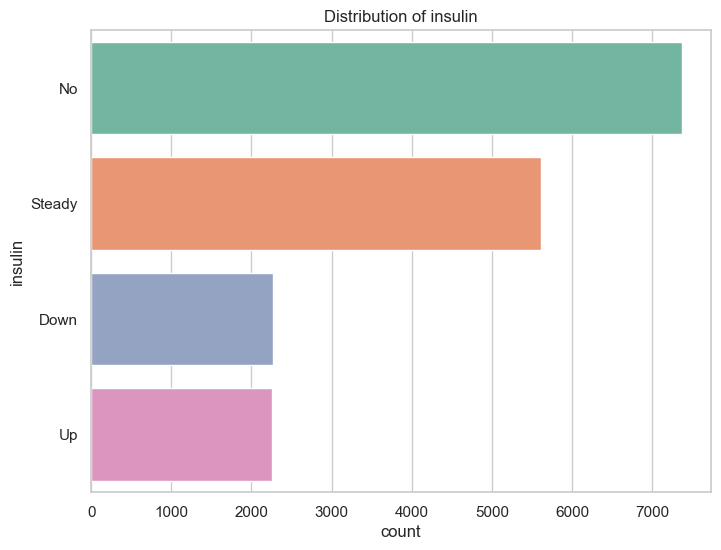

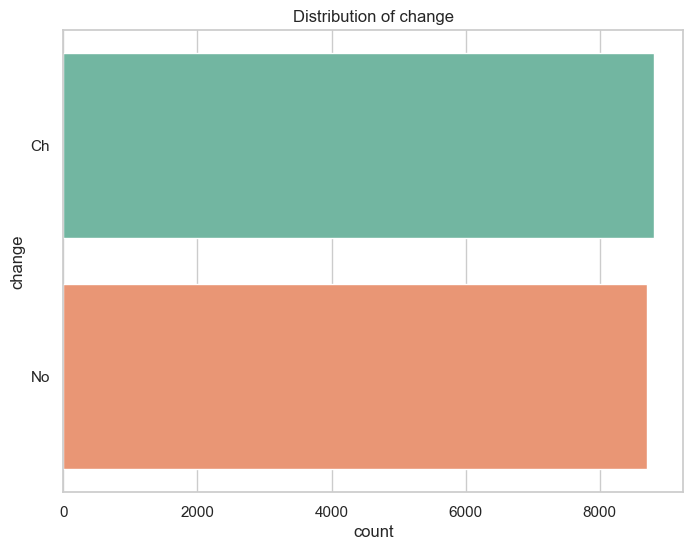

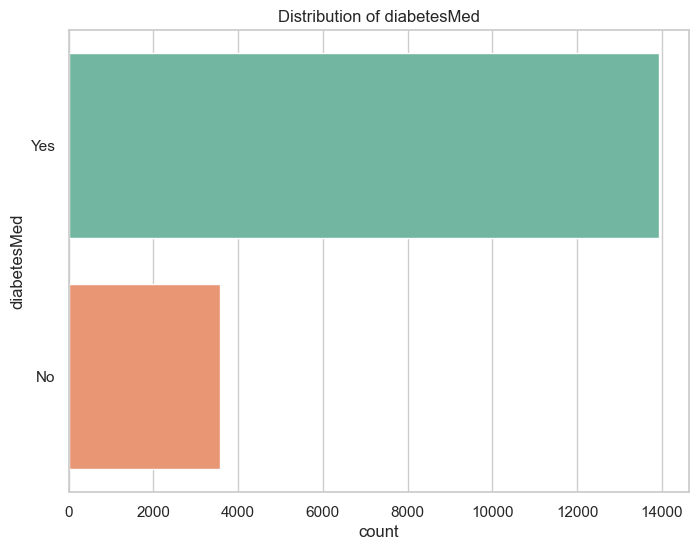

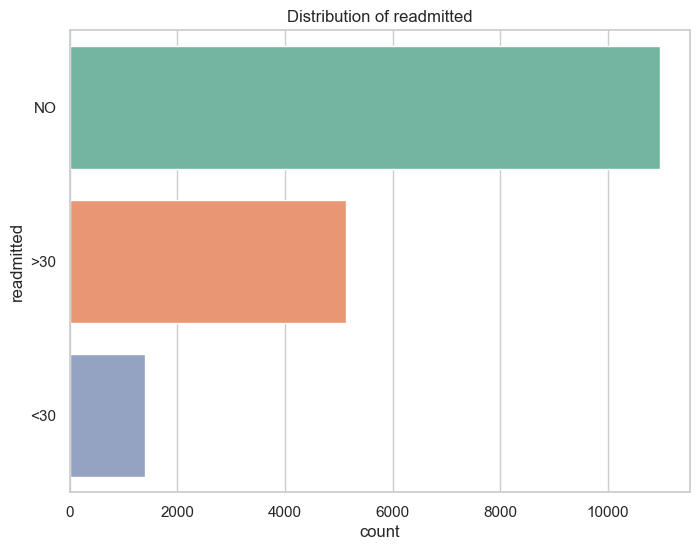

In [10]:
# Plotting count plots for categorical features
for feature in df.select_dtypes(exclude=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.show()


In [11]:
# Example of feature engineering: Binning 'time_in_hospital'
df['hospital_stay_length'] = pd.cut(df['time_in_hospital'], bins=[0, 3, 7, 14], labels=['Short', 'Medium', 'Long'])
print(df[['time_in_hospital', 'hospital_stay_length']].head())


       time_in_hospital hospital_stay_length
20737                 3                Short
20824                 4               Medium
21083                10                 Long
23879                12                 Long
23922                12                 Long


lets start with data exploration

In [12]:
# Load the ICD codes and ID mappings
icd_codes = pd.read_csv('icd_codes.csv')
id_mappings = pd.read_csv('IDs_mapping.csv')

# Display the head of the dataframes to understand their structure
print(icd_codes.head())
print(id_mappings.head())


  ICD_Code                     Description
0        0                             NaN
1        1                         Cholera
2        2  Typhoid and paratyphoid fevers
3        3     Other Salmonella infections
4        4                     Shigellosis
  admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available


In [13]:
# Example of merging, adjust the keys according to your dataframes' structure
df = df.merge(icd_codes, left_on='diag_1', right_on='ICD_Code', how='left')
df.head()



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,hospital_stay_length,ICD_Code,Description
0,72848634,20377854,Caucasian,Female,65.0,2,1,1,3,MC,...,No,No,No,Steady,No,Yes,NO,Short,V56,Aftercare involving intermittent dialysis
1,73062156,20408121,Caucasian,Female,95.0,1,1,7,4,MC,...,No,No,No,No,No,Yes,NO,Medium,532,Duodenal ulcer
2,73731852,20542797,Caucasian,Male,75.0,1,2,7,10,MC,...,No,No,No,Steady,Ch,Yes,NO,Long,682,Other cellulitis and abscess
3,81355914,7239654,Caucasian,Female,75.0,1,3,6,12,UN,...,No,No,No,Steady,No,Yes,NO,Long,238,Neoplasm of uncertain behaviour of other and u...
4,81458964,15466212,Caucasian,Male,75.0,1,3,6,12,MC,...,No,No,No,No,No,No,NO,Long,532,Duodenal ulcer


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17508 entries, 0 to 17507
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              17508 non-null  int64   
 1   patient_nbr               17508 non-null  int64   
 2   race                      17508 non-null  object  
 3   gender                    17508 non-null  object  
 4   age                       17508 non-null  float64 
 5   admission_type_id         17508 non-null  int64   
 6   discharge_disposition_id  17508 non-null  int64   
 7   admission_source_id       17508 non-null  int64   
 8   time_in_hospital          17508 non-null  int64   
 9   payer_code                17508 non-null  object  
 10  medical_specialty         17508 non-null  object  
 11  num_lab_procedures        17508 non-null  int64   
 12  num_procedures            17508 non-null  int64   
 13  num_medications           17508 non-null  int6

In [15]:
# Convert 'NO' values in the 'readmitted' column to 0, and '<30' and '>30' to 1 respectively
# Using lambda function to apply the conversion logic
# If 'NO' is encountered, it is replaced with 0, otherwise with 1
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,hospital_stay_length,ICD_Code,Description
0,72848634,20377854,Caucasian,Female,65.0,2,1,1,3,MC,...,No,No,No,Steady,No,Yes,0,Short,V56,Aftercare involving intermittent dialysis
1,73062156,20408121,Caucasian,Female,95.0,1,1,7,4,MC,...,No,No,No,No,No,Yes,0,Medium,532,Duodenal ulcer
2,73731852,20542797,Caucasian,Male,75.0,1,2,7,10,MC,...,No,No,No,Steady,Ch,Yes,0,Long,682,Other cellulitis and abscess
3,81355914,7239654,Caucasian,Female,75.0,1,3,6,12,UN,...,No,No,No,Steady,No,Yes,0,Long,238,Neoplasm of uncertain behaviour of other and u...
4,81458964,15466212,Caucasian,Male,75.0,1,3,6,12,MC,...,No,No,No,No,No,No,0,Long,532,Duodenal ulcer


In [16]:


# Define threshold for reducing levels in categorical variables
threshold = 10  # Adjust this value based on your preference

# Step 1: Identify Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Calculate Distinct Values and Frequencies
for column in categorical_columns:
    print(f"Column: {column}")
    distinct_values = df[column].nunique()
    print(f"Distinct Values: {distinct_values}")
    value_frequencies = df[column].value_counts()
    print("Value Frequencies:")
    print(value_frequencies)
    print()

    # Step 3: Assess the Number of Distinct Values and Step 4: Reduce Levels if Necessary
    # Example of reducing levels by grouping infrequent values into an 'Other' category
    if distinct_values > threshold:
        infrequent_values = value_frequencies[value_frequencies < threshold].index
        df[column].replace(infrequent_values, 'Other', inplace=True)

# Display the updated DataFrame after reducing levels
print(df.head())


Column: race
Distinct Values: 5
Value Frequencies:
race
Caucasian          13211
AfricanAmerican     3516
Hispanic             331
Other                305
Asian                145
Name: count, dtype: int64

Column: gender
Distinct Values: 2
Value Frequencies:
gender
Female    9371
Male      8137
Name: count, dtype: int64

Column: payer_code
Distinct Values: 16
Value Frequencies:
payer_code
MC    8798
SP    1859
BC    1810
UN    1259
MD    1043
HM    1027
CP     752
CM     343
OG     310
PO     115
DM      84
WC      53
CH      21
OT      19
MP      11
SI       4
Name: count, dtype: int64

Column: medical_specialty
Distinct Values: 52
Value Frequencies:
medical_specialty
InternalMedicine                     4343
Emergency/Trauma                     3984
Family/GeneralPractice               1946
Cardiology                           1759
Surgery-General                      1171
Radiologist                           782
Orthopedics                           592
Nephrology                

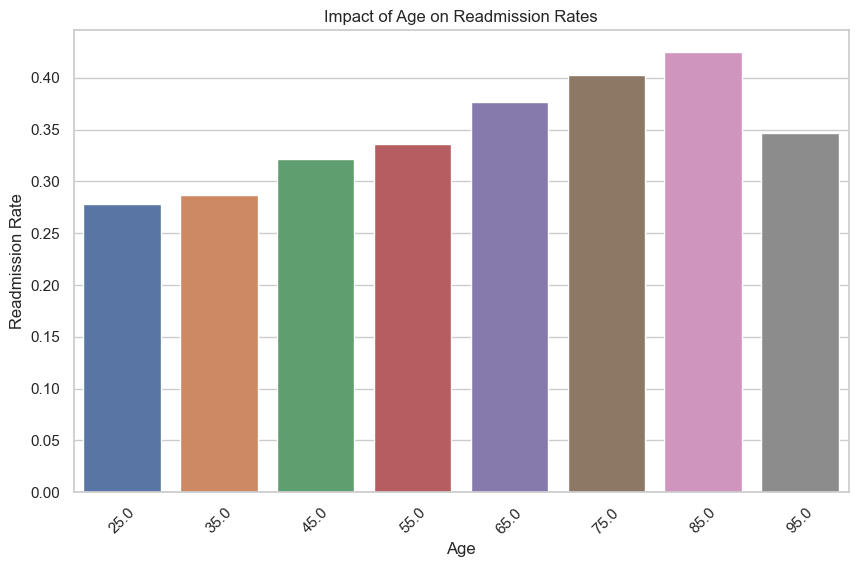

In [17]:
# Group data by 'age' and calculate mean readmission rate for each group
age_readmission = df.groupby('age')['readmitted'].mean().reset_index()

# Age and Readmission Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='readmitted', data=df, errorbar=None)
plt.title('Impact of Age on Readmission Rates')
plt.xlabel('Age')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.show()


In [18]:
from scipy.stats import ttest_ind

# Separate the dataset into readmitted and not-readmitted groups based on the 'readmitted' column
readmitted = df[df['readmitted'] == 1]['age']
not_readmitted = df[df['readmitted'] == 0]['age']

# Perform a t-test between the two groups
t_stat, p_value = ttest_ind(readmitted, not_readmitted)

t_stat, p_value

(9.871259482740937, 6.36618749188437e-23)

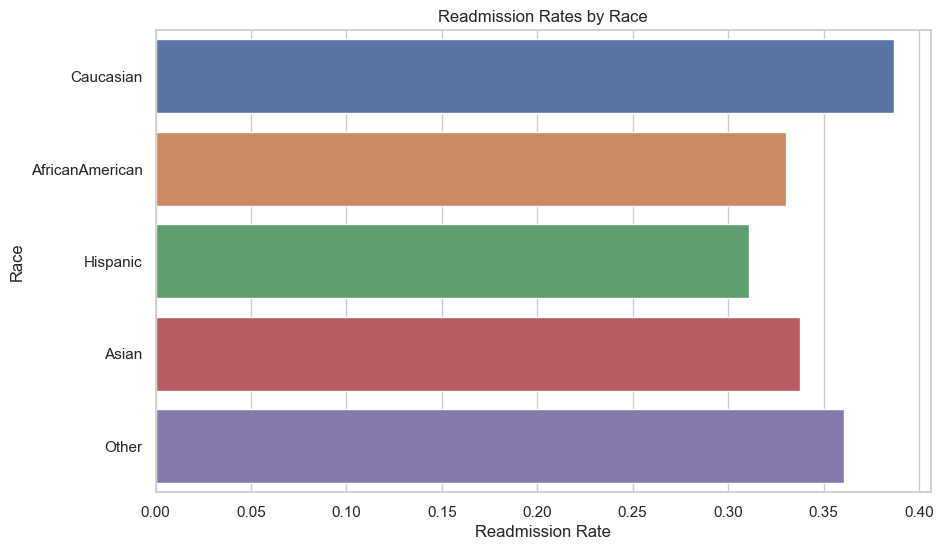

In [19]:
 # Race and Readmission Analysis

plt.figure(figsize=(10, 6))
sns.barplot(x='readmitted', y='race', data=df, errorbar=None)
plt.title('Readmission Rates by Race')
plt.xlabel('Readmission Rate')
plt.ylabel('Race')
plt.show()

In [20]:
# Calculate readmission rates by race
readmission_rates_by_race = df.groupby('race')['readmitted'].mean().sort_values(ascending=False)

# Prepare data for chi-squared test
# Count the number of readmitted and not-readmitted patients in each racial group
readmission_counts = df.groupby(['race', 'readmitted']).size().unstack(fill_value=0)

readmission_rates_by_race, readmission_counts


(race
 Caucasian          0.386799
 Other              0.360656
 Asian              0.337931
 AfricanAmerican    0.330205
 Hispanic           0.311178
 Name: readmitted, dtype: float64,
 readmitted          0     1
 race                       
 AfricanAmerican  2355  1161
 Asian              96    49
 Caucasian        8101  5110
 Hispanic          228   103
 Other             195   110)

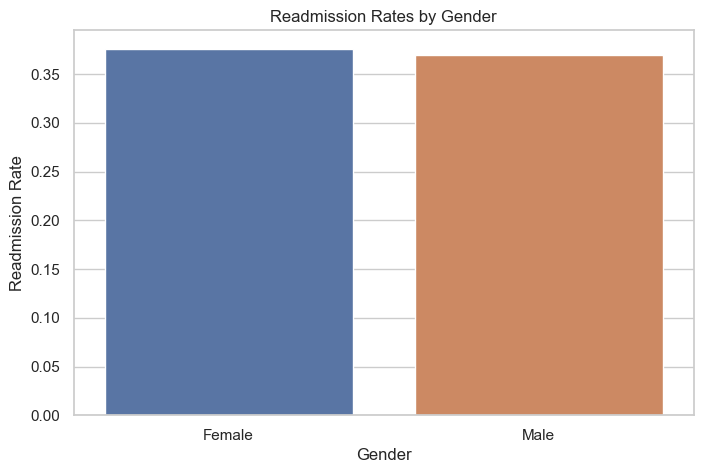

In [21]:
# Gender and Readmission Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='readmitted', data=df, errorbar=None)
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate')
plt.show()

In [22]:
# Calculate readmission rates by gender
readmission_rates_by_gender = df.groupby('gender')['readmitted'].mean()

# Prepare data for chi-squared test
# Count the number of readmitted and not-readmitted patients in each gender category
readmission_counts_gender = df.groupby(['gender', 'readmitted']).size().unstack(fill_value=0)

readmission_rates_by_gender, readmission_counts_gender


(gender
 Female    0.376160
 Male      0.369669
 Name: readmitted, dtype: float64,
 readmitted     0     1
 gender                
 Female      5846  3525
 Male        5129  3008)

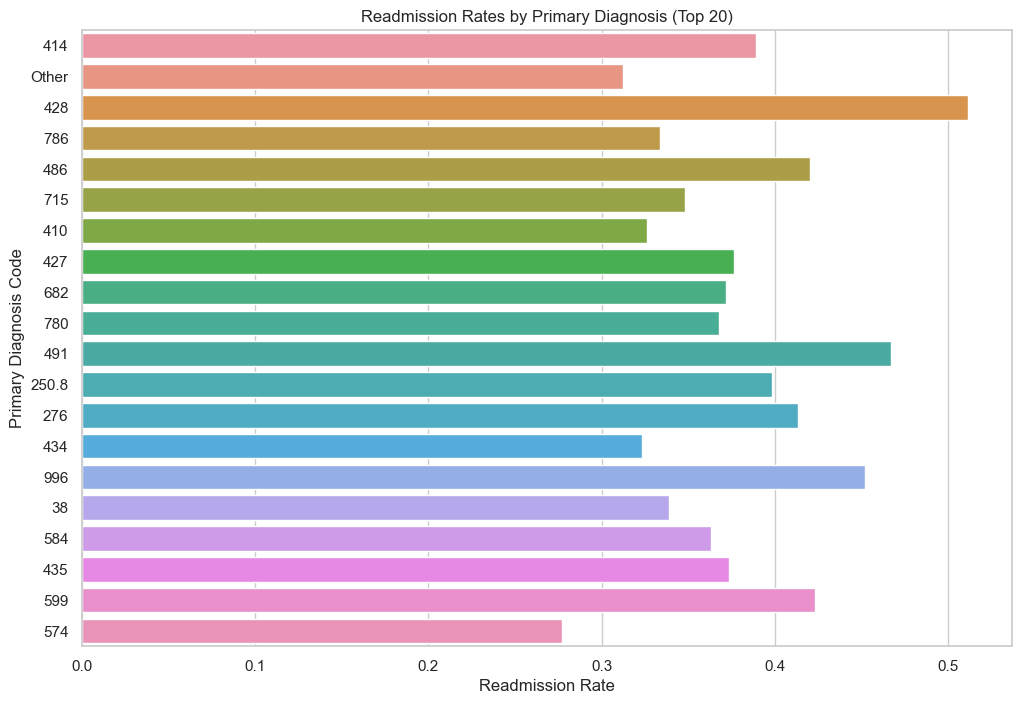

In [23]:
# Diagnosis Type (diag_1) and Readmission Analysis
plt.figure(figsize=(12, 8))
# To avoid cluttering the plot with too many categories, we'll display the top 20 diagnoses by count
top_diagnoses = df['diag_1'].value_counts().nlargest(20).index
filtered_df = df[df['diag_1'].isin(top_diagnoses)]

sns.barplot(x='readmitted', y='diag_1', data=filtered_df,errorbar=None, order=top_diagnoses)
plt.title('Readmission Rates by Primary Diagnosis (Top 20)')
plt.xlabel('Readmission Rate')
plt.ylabel('Primary Diagnosis Code')
plt.show()




In [24]:
# Identify the top 10 most common primary diagnoses (diag_1)
top_10_diagnoses = df['diag_1'].value_counts().nlargest(10).index

# Filter the dataframe for these top diagnoses
filtered_df_diag = df[df['diag_1'].isin(top_10_diagnoses)]

# Calculate readmission rates for each of the top 10 diagnoses
readmission_rates_by_diag = filtered_df_diag.groupby('diag_1')['readmitted'].mean().sort_values(ascending=False)

# Prepare data for chi-squared test
# Count the number of readmitted and not-readmitted patients for each of the top 10 diagnoses
readmission_counts_diag = filtered_df_diag.groupby(['diag_1', 'readmitted']).size().unstack(fill_value=0)

readmission_rates_by_diag, readmission_counts_diag


(diag_1
 428      0.511270
 486      0.420221
 414      0.389102
 427      0.376147
 682      0.371795
 780      0.367609
 715      0.347979
 786      0.333803
 410      0.326203
 Other    0.312127
 Name: readmitted, dtype: float64,
 readmitted    0    1
 diag_1              
 410         378  183
 414         796  507
 427         340  205
 428         477  499
 486         367  266
 682         245  145
 715         371  198
 780         246  143
 786         473  237
 Other       692  314)

In [25]:
from scipy.stats import chi2_contingency

# Assuming readmission_counts_diag is a contingency table for the top 10 diagnoses
# Perform chi-squared test for the top 10 diagnoses
chi2_diag, p_diag, dof_diag, expected_diag = chi2_contingency(readmission_counts_diag)

print("Chi-squared statistic:", chi2_diag)
print("P-value:", p_diag)


Chi-squared statistic: 111.9446736964002
P-value: 5.90606434174655e-20


In [26]:
from sklearn.model_selection import train_test_split

# Selecting the specified columns for the model
model_columns = ['num_medications', 'number_outpatient', 'number_emergency', 
                 'time_in_hospital', 'number_inpatient', 'encounter_id', 
                 'age', 'num_lab_procedures', 'number_diagnoses', 'num_procedures', 'readmitted']

# Creating the sub-dataset
model_df = df[model_columns]

# Splitting the data into training and test sets
X = model_df.drop('readmitted', axis=1)  # Features
y = model_df['readmitted']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((14006, 10), (3502, 10), (14006,), (3502,))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

conf_matrix, cv_scores, cv_scores.mean()

(array([[2219,    0],
        [1283,    0]]),
 array([0.62526767, 0.62513388, 0.62513388, 0.62513388, 0.62513388]),
 0.6251606377960763)

In [28]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,hospital_stay_length,ICD_Code,Description
0,72848634,20377854,Caucasian,Female,65.0,2,1,1,3,MC,...,No,No,No,Steady,No,Yes,0,Short,Other,Other
1,73062156,20408121,Caucasian,Female,95.0,1,1,7,4,MC,...,No,No,No,No,No,Yes,0,Medium,532,Duodenal ulcer
2,73731852,20542797,Caucasian,Male,75.0,1,2,7,10,MC,...,No,No,No,Steady,Ch,Yes,0,Long,682,Other cellulitis and abscess
3,81355914,7239654,Caucasian,Female,75.0,1,3,6,12,UN,...,No,No,No,Steady,No,Yes,0,Long,238,Neoplasm of uncertain behaviour of other and u...
4,81458964,15466212,Caucasian,Male,75.0,1,3,6,12,MC,...,No,No,No,No,No,No,0,Long,532,Duodenal ulcer


In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer

# Assuming 'df' has been loaded and contains the preprocessed data

# Define features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Column transformer for handling numeric and categorical features differently
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number', 'bool']).columns),
        ('cat', OneHotEncoder(drop='first'), X.select_dtypes(exclude=['number', 'bool']).columns)
    ])

# Initialize XGBoost classifier with base parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Pipeline with SMOTE, preprocessor, and XGBoost
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler(with_mean=False)),  # Set with_mean=False here
    ('xgb', xgb)
])

# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'xgb__n_estimators': [200, 300, 400],
    'xgb__max_depth': [3, 4, 5],
    'xgb__learning_rate': [0.03, 0.05, 0.07],
    'xgb__subsample': [0.7, 0.8, 0.9],
    'xgb__colsample_bytree': [0.7, 0.8, 0.9],
    'xgb__gamma': [0, 0.1, 0.2]
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search.fit(X, y)

# Best model after search
best_model = random_search.best_estimator_

# Split the data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Predictions and evaluation on the test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Outputting results
print("Best Model Parameters:", random_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_proba))


Best Model Parameters: {'xgb__subsample': 0.8, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.79      2195
           1       0.66      0.41      0.51      1307

    accuracy                           0.70      3502
   macro avg       0.69      0.64      0.65      3502
weighted avg       0.69      0.70      0.68      3502

Confusion Matrix:
[[1919  276]
 [ 768  539]]
ROC-AUC Score:
0.7428157128341696


In [37]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,hospital_stay_length,ICD_Code,Description
0,72848634,20377854,Caucasian,Female,65.0,2,1,1,3,MC,...,No,No,No,Steady,No,Yes,0,Short,Other,Other
1,73062156,20408121,Caucasian,Female,95.0,1,1,7,4,MC,...,No,No,No,No,No,Yes,0,Medium,532,Duodenal ulcer
2,73731852,20542797,Caucasian,Male,75.0,1,2,7,10,MC,...,No,No,No,Steady,Ch,Yes,0,Long,682,Other cellulitis and abscess
3,81355914,7239654,Caucasian,Female,75.0,1,3,6,12,UN,...,No,No,No,Steady,No,Yes,0,Long,238,Neoplasm of uncertain behaviour of other and u...
4,81458964,15466212,Caucasian,Male,75.0,1,3,6,12,MC,...,No,No,No,No,No,No,0,Long,532,Duodenal ulcer


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

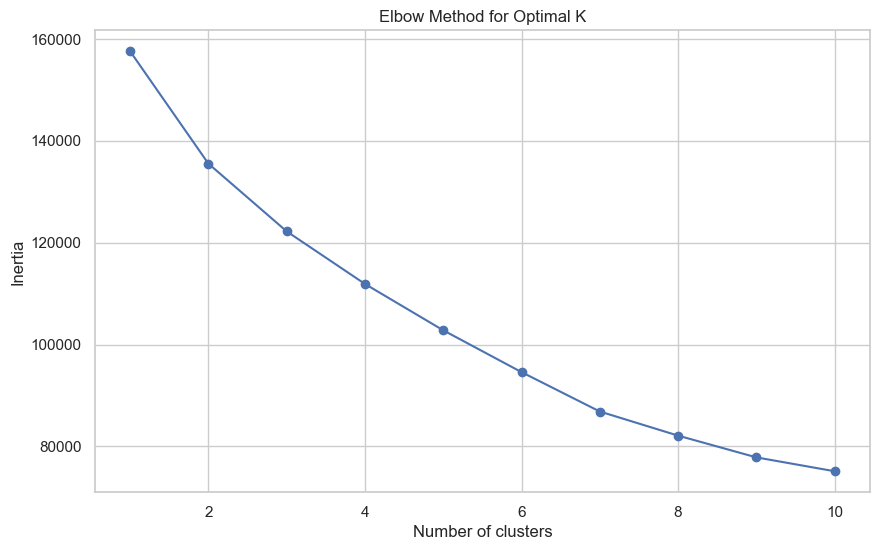

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' has been loaded and contains the preprocessed data

# Selecting relevant features for clustering
# For simplicity, we'll focus on numerical features
numerical_features = ['num_medications', 'number_outpatient', 'number_emergency', 
                      'time_in_hospital', 'number_inpatient', 'age', 
                      'num_lab_procedures', 'number_diagnoses', 'num_procedures']

# Create a new DataFrame for clustering
cluster_df = df[numerical_features]

# Scaling the data
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization purposes
cluster_df_pca = pca.fit_transform(cluster_df_scaled)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(cluster_df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


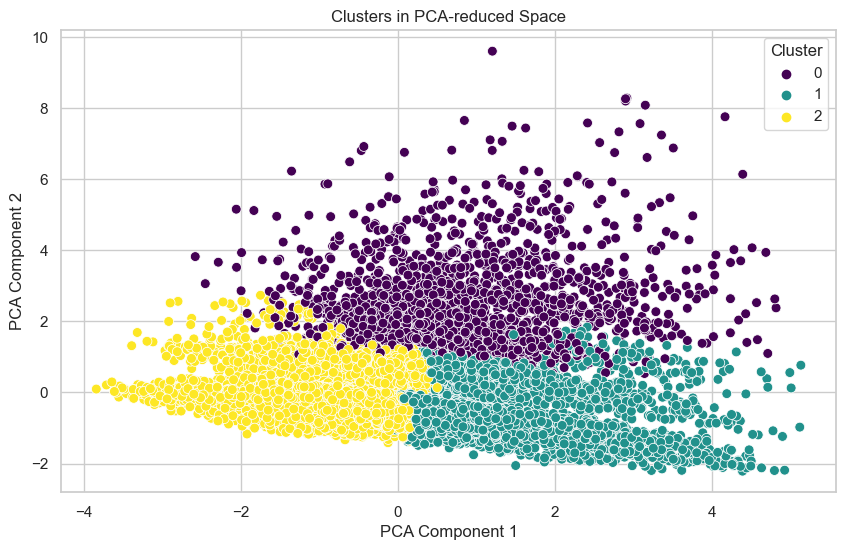

In [39]:
# Assuming an optimal K is chosen based on the Elbow method
optimal_k = 3  # Replace 3 with your chosen K value

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_df_scaled)

# Visualize the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cluster_df_pca[:, 0], y=cluster_df_pca[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster
0    0.572519
1    0.399479
2    0.317805
Name: readmitted, dtype: float64


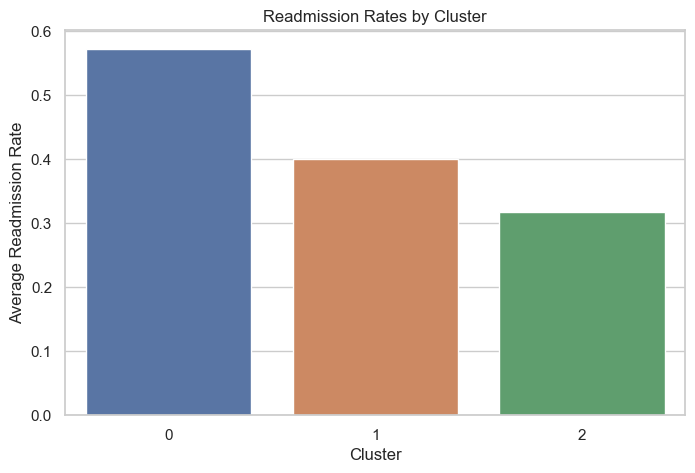

In [41]:
# Append cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Analyze readmission rates by cluster
cluster_readmission_rates = df.groupby('Cluster')['readmitted'].mean()

print(cluster_readmission_rates)

# Visualize readmission rates by cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_readmission_rates.index, y=cluster_readmission_rates.values)
plt.title('Readmission Rates by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Readmission Rate')
plt.show()
